#Task 2
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Eplore the relationships between variables and identify patterns and trends in the data.

Dataset use (Airlines_booking): https://www.kaggle.com/datasets/anandshaw2001/airlines-booking-csv

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
#Read the csv
df = pd.read_csv('booking.csv', encoding='latin-1')

Cleaning and exploratory data analysis (EDA)

In [20]:
#To visualize the columns available in the csv
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [21]:
#To see the type of values that are inside the variables 
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [22]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [24]:
#To visualize the variables that contains null values 
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Graph analysis 

<Axes: >

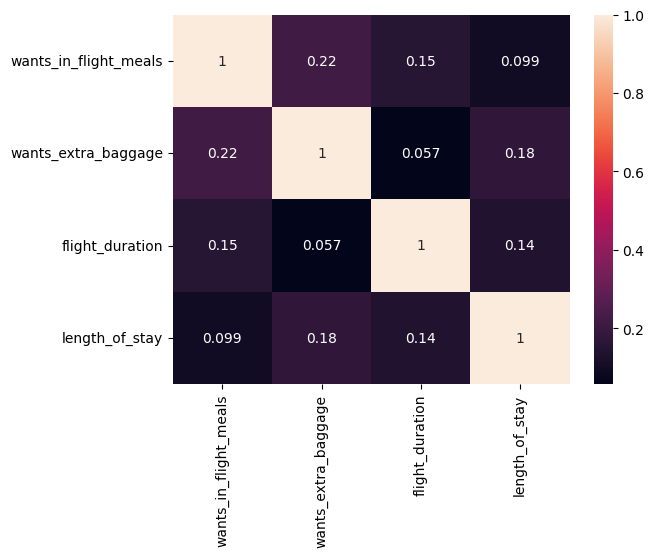

In [9]:
sns.heatmap(df[["wants_in_flight_meals", "wants_extra_baggage","flight_duration","length_of_stay"]].corr(), annot=True)

Text(0, 0.5, 'Count')

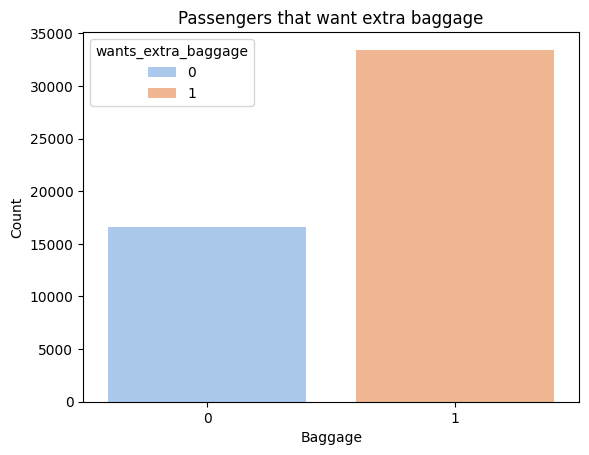

In [19]:
sns.countplot(x='wants_extra_baggage',hue='wants_extra_baggage',data=df,palette='pastel')
plt.title('Passengers that want extra baggage')
plt.xlabel('Baggage')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

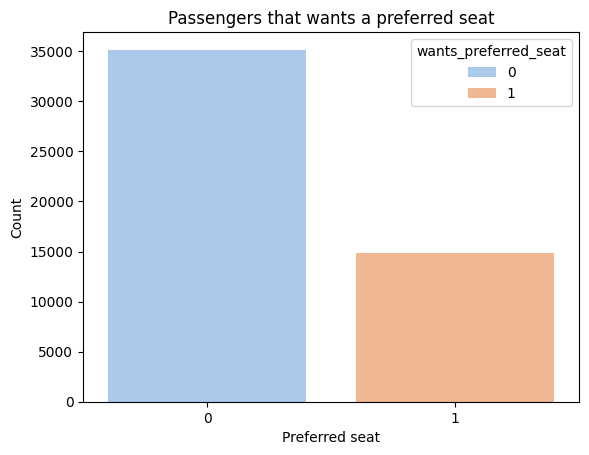

In [18]:
sns.countplot(x='wants_preferred_seat',hue='wants_preferred_seat',data=df,palette='pastel')
plt.title('Passengers that wants a preferred seat')
plt.xlabel('Preferred seat')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

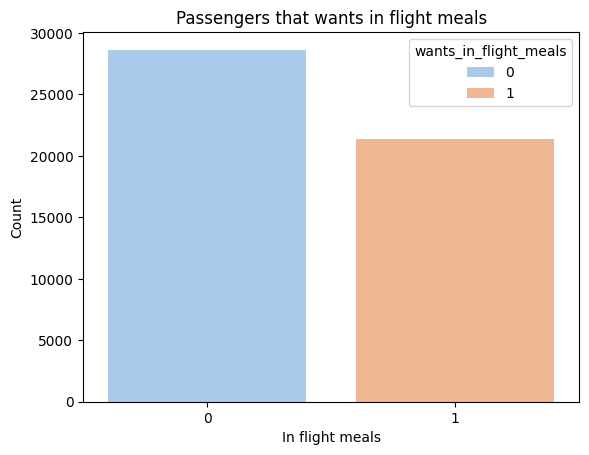

In [17]:
sns.countplot(x='wants_in_flight_meals',hue = 'wants_in_flight_meals' ,data=df,palette='pastel')
plt.title('Passengers that wants in flight meals')
plt.xlabel('In flight meals')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

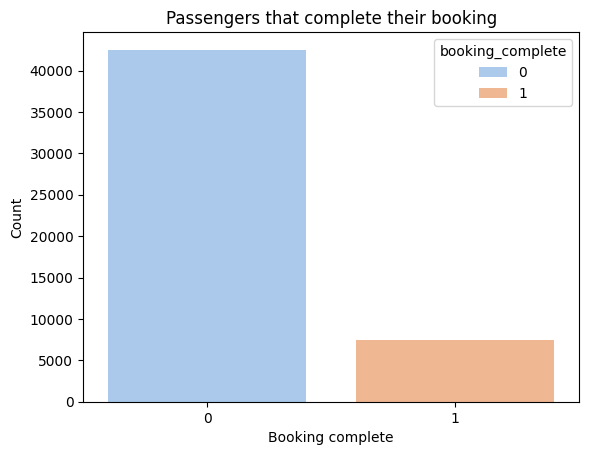

In [16]:
sns.countplot(x='booking_complete', hue = 'booking_complete' , data=df,palette='pastel')
plt.title('Passengers that complete their booking')
plt.xlabel('Booking complete')
plt.ylabel('Count')

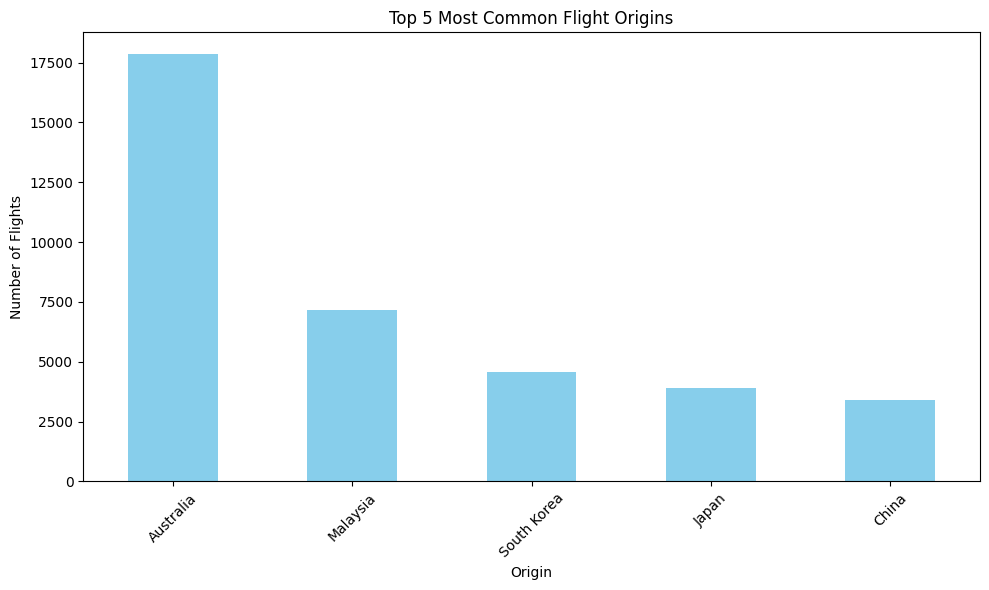

In [35]:
top_origins = df['booking_origin'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_origins.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Common Flight Origins')
plt.xlabel('Origin')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

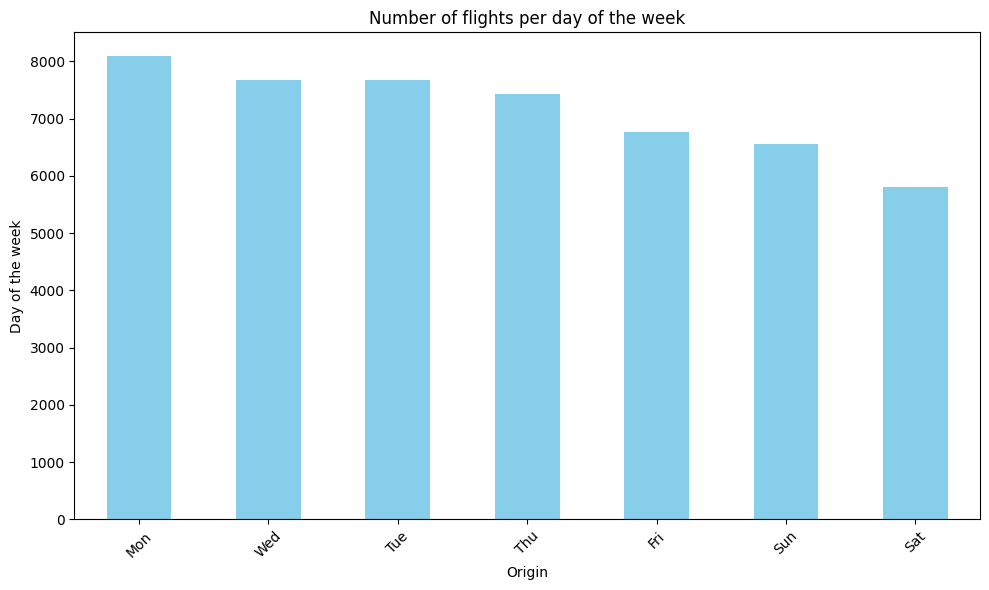

In [14]:
dayofweek = df['flight_day'].value_counts().head(7)

# Plotting
plt.figure(figsize=(10, 6))
dayofweek.plot(kind='bar', color='skyblue')
plt.title('Number of flights per day of the week')
plt.xlabel('Origin')
plt.ylabel('Day of the week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusions:
- It is more common for passengers to add extra baggage to their flight.
- There is a big difference between the people who normally complete their booking and those who normally do not, which is what the majority do.
- Australia is the destination origin from which most people fly and has a significant difference from the rest of the flight origins.
- Weekends are the days when fewer people fly.
- People do not normally want a meal during the flight 
- And there is a lot of people that is not interested in buying a preferred seat